URL: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import ipywidgets as widgets
import numpy as np
df = pd.read_csv('/Users/yiweihan/Desktop/weather.csv')
print(df.head())
df['time'] = pd.to_datetime(df['time'])
df['Year'] = df['time'].dt.year
df['Month'] = df['time'].dt.month
df['Day'] = df['time'].dt.day
df['exacttime'] = df['time'].dt.time
df['Ftemp'] = (df['Ktemp'] - 273.15) * (9/5) + 32
print(df.head())

                 time  longitude  latitude      Ktemp
0  1950-01-01 9:00:00        286     40.75  274.39734
1  1950-01-02 9:00:00        286     40.75  277.07593
2  1950-01-03 9:00:00        286     40.75  280.80090
3  1950-01-04 9:00:00        286     40.75  287.14010
4  1950-01-05 9:00:00        286     40.75  285.65262
                 time  longitude  latitude      Ktemp  Year  Month  Day  \
0 1950-01-01 09:00:00        286     40.75  274.39734  1950      1    1   
1 1950-01-02 09:00:00        286     40.75  277.07593  1950      1    2   
2 1950-01-03 09:00:00        286     40.75  280.80090  1950      1    3   
3 1950-01-04 09:00:00        286     40.75  287.14010  1950      1    4   
4 1950-01-05 09:00:00        286     40.75  285.65262  1950      1    5   

  exacttime      Ftemp  
0  09:00:00  34.245212  
1  09:00:00  39.066674  
2  09:00:00  45.771620  
3  09:00:00  57.182180  
4  09:00:00  54.504716  


## Part A

In [2]:
def plot_monthly_avg_for_year(selected_year):
    df_year = df[df['Year'] == selected_year]
    monthly_avg = df_year.groupby('Month')['Ftemp'].mean().reset_index()
    plt.figure(figsize=(6,4))
    plt.plot(monthly_avg['Month'], monthly_avg['Ftemp'], marker='o')
    plt.title(f'Average Monthly Temperature (F) for Year {selected_year}')
    plt.xlabel('Month')
    plt.ylabel('Temperature (F)')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

min_year = df['Year'].min()
max_year = df['Year'].max()

@interact(
    year=IntSlider(
        min=min_year, 
        max=max_year, 
        step=1, 
        value=min_year, 
        description='Select Year:'
    )
)
def interactive_year_filter(year):
    plot_monthly_avg_for_year(year)

interactive(children=(IntSlider(value=1950, description='Select Year:', max=2021, min=1950), Output()), _dom_c…

## Part B

In [3]:
yearly_avg = df.groupby('Year')['Ftemp'].mean().reset_index()
threshold = 55
warm_years = yearly_avg[yearly_avg['Ftemp'] > threshold]
first_warm_year = warm_years['Year'].min()
print(f"The first year where the annual average temperature exceeds 55°F is {first_warm_year}.")

The first year where the annual average temperature exceeds 55°F is 1953.


## Part C

This plot is the monthly average temperature with standard deviation. We can see that the standard deviation in colder months is larger than in hotter months.

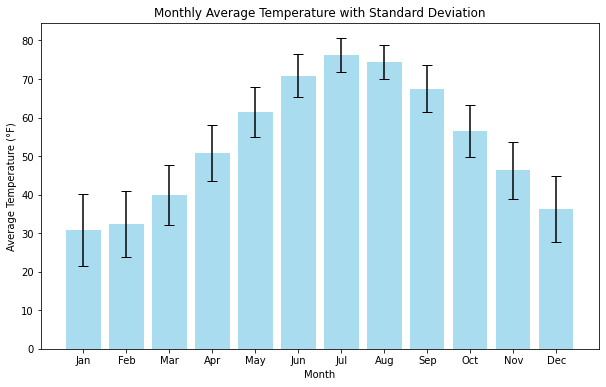

In [4]:
monthly_stats = df.groupby('Month')['Ftemp'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(monthly_stats['Month'], monthly_stats['mean'], 
        yerr=monthly_stats['std'], capsize=5, color='skyblue', alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Average Temperature (°F)")
plt.title("Monthly Average Temperature with Standard Deviation")
plt.xticks(monthly_stats['Month'], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

This is the yearly average temperature time serious plot. We can see that the average temperature varies a lot year by year, but there is an increasing trend in average temperature as time proceeds. 

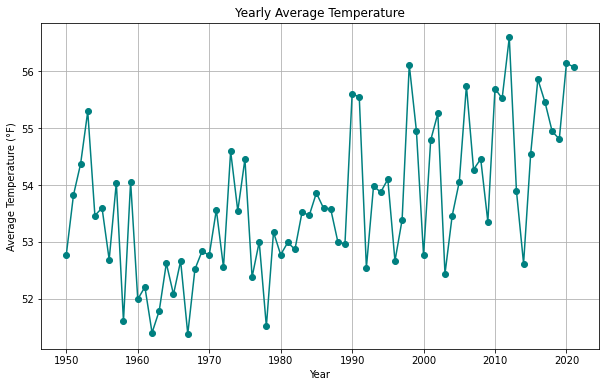

In [5]:
yearly_avg = df.groupby('Year')['Ftemp'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg['Year'], yearly_avg['Ftemp'], marker='o', linestyle='-', color='teal')
plt.title('Yearly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.grid(True)
plt.show()

This is the hitogram distribution of all the temperatures. We can see there's a bimodal distribution with one centered at 40 and another centered at around 75.

In [6]:
def plot_histogram(nbins):
    plt.figure(figsize=(10, 6))
    plt.hist(df['Ftemp'], bins=nbins, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of Temperature (bins={nbins})")
    plt.xlabel("Temperature (°F)")
    plt.ylabel("Frequency")
    plt.show()

nbins_slider = widgets.IntSlider(
    value=20,
    min=5,
    max=100,
    step=5,
    description='Bins:',
    continuous_update=False
)
interact(plot_histogram, nbins=nbins_slider);


interactive(children=(IntSlider(value=20, continuous_update=False, description='Bins:', min=5, step=5), Output…

This plot is the temperatur trend with polynomial fit that you can adjust for each year and up to 10 degree polynomial. You can see as number of degree increases, the better fit for the trend in temperature.

In [7]:
def poly_fit_temperature(year, poly_order):
    df_year = df[df['Year'] == year].sort_values('time')
    x = (df_year['time'] - pd.Timestamp(year=year, month=1, day=1)).dt.days.values
    y = df_year['Ftemp'].values
    coeffs = np.polyfit(x, y, poly_order)
    poly = np.poly1d(coeffs)
    x_fit = np.linspace(x.min(), x.max(), 300)
    y_fit = poly(x_fit)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label="Daily Temperature", alpha=0.6)
    plt.plot(x_fit, y_fit, color='red', label=f"Poly Fit (order {poly_order})", linewidth=2)
    plt.xlabel("Day Number in Year")
    plt.ylabel("Temperature (°F)")
    plt.title(f"Temperature Trend in {year} with Polynomial Fit")
    plt.legend()
    plt.grid(True)
    plt.show()

year_options = sorted(df['Year'].unique())
interact(poly_fit_temperature, year=year_options, poly_order=(1, 10, 1));

interactive(children=(Dropdown(description='year', options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 19…

3D scatter plot displays how the temperature in a selected month changes over multiple years, with the x-axis representing the year, the y-axis representing the day of the month, and the z-axis showing the temperature in Fahrenheit, providing comparison of intra-month temperature variations across different years.

In [8]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_temperature(month):
    df_month = df[df['time'].dt.month == month]
    if df_month.empty:
        print("No data for this month.")
        return
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(df_month['Year'], df_month['Day'], df_month['Ftemp'], 
                    c=df_month['Ftemp'], cmap='coolwarm', s=50)
    ax.set_xlabel("Year")
    ax.set_ylabel("Day of Month")
    ax.set_zlabel("Temperature (°F)")
    ax.set_title(f"3D Scatter of Temperature in Month {month}")
    plt.colorbar(sc, label="Temperature (°F)")
    plt.show()

month_options = list(range(1, 13))
interact(plot_3d_temperature, month=month_options);

interactive(children=(Dropdown(description='month', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1),…

This plot shows the box plot of each year each season's temperature. It is easy to see the distribution of each season's temperature, with outliers, and gives you a variation in the temperature change across seasons. 

In [9]:
import seaborn as sns
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

def boxplot_temperature_season(year):
    df_year = df[df['Year'] == year].copy()
    df_year['Season'] = df_year['Month'].apply(assign_season)
    
    plt.figure(figsize=(8, 6))
    order = ['Winter', 'Spring', 'Summer', 'Fall']
    sns.boxplot(x='Season', y='Ftemp', data=df_year, order=order, palette='pastel')
    plt.title(f"Temperature Distribution by Season in {year}")
    plt.xlabel("Season")
    plt.ylabel("Temperature (°F)")
    plt.show()
interact(boxplot_temperature_season, year=sorted(df['Year'].unique()));

interactive(children=(Dropdown(description='year', options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 19…

This plot let you choose 2 years, and it will display the monthly difference in temperature to visualize, which is very useful to see the climate change.

In [10]:
def compare_temperature_years(year1, year2):
    df_y1 = df[df['Year'] == year1].copy()
    df_y2 = df[df['Year'] == year2].copy()
    avg_temp_y1 = df_y1.groupby(df_y1['time'].dt.month)['Ftemp'].mean()
    avg_temp_y2 = df_y2.groupby(df_y2['time'].dt.month)['Ftemp'].mean()
    common_months = avg_temp_y1.index.intersection(avg_temp_y2.index)
    avg_y1 = avg_temp_y1.loc[common_months]
    avg_y2 = avg_temp_y2.loc[common_months]
    
    plt.figure(figsize=(12, 6))
    plt.plot(common_months, avg_y1, marker='o', label=f"{year1}", alpha=0.8)
    plt.plot(common_months, avg_y2, marker='o', label=f"{year2}", alpha=0.8)
    plt.plot(common_months, avg_y1 - avg_y2, marker='x', linestyle="--", label="Difference", color="black")
    plt.xlabel("Month")
    plt.ylabel("Temperature (°F)")
    plt.title(f"Comparative Monthly Temperature: {year1} vs {year2}")
    plt.xticks(common_months)
    plt.legend()
    plt.grid(True)
    plt.show()

from ipywidgets import interact
years = sorted(df['Year'].unique())
interact(compare_temperature_years, year1=years, year2=years);


interactive(children=(Dropdown(description='year1', options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1…